<a href="https://colab.research.google.com/github/F1ame21/Primat_Labs/blob/main/lab2/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Алгоритм градиентного спуска 

1. Берем случайную точку $x$ функции $F$, фиксируем $\epsilon$ (например, $\epsilon = 0.001$)
2. Вычисляем производную $F'(x)$
3. Изменяем $x$ : $x = x - \epsilon F'(x)$ 
4. Повторяем 3, пока не пройдет определенное количество шагов и/или мы не станем достаточно близко к точке минимума.

Этот алгоритм называется **алгоритм градиентного спуска**. "Градиентного" -- потому что мы "спускаемся" к точке минимума, вычисляя производную (градиент) функции на каждом шаге.

In [ ]:
import numpy as np
from scipy.misc import derivative
from sympy import *
from mpl_toolkits.mplot3d import Axes3D
from numpy import arange
from numpy import meshgrid
from matplotlib import pylab, gridspec, pyplot as plt
from random import *
import math
import sympy

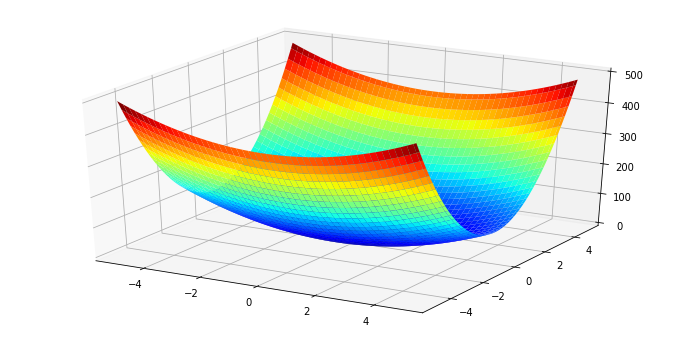

In [ ]:
# трехмерная версия графика
def objective(x, y):
	return 4 * x ** 2 + 16 * y ** 2

def draw_3d_model():# промежуток 
	a, b = -5.0, 5.0
	# берем значение на заданном интервале
	xaxis = arange(a, b, 0.1)
	yaxis = arange(a, b, 0.1)
	# создаем сетку
	x, y = meshgrid(xaxis, yaxis)
	# compute targets
	results = objective(x, y)
	# create a surface plot with the jet color scheme
	fig = plt.figure(figsize = (12, 6))
	axis = fig.gca(projection='3d')
	axis.plot_surface(x, y, results, cmap='jet')
draw_3d_model()

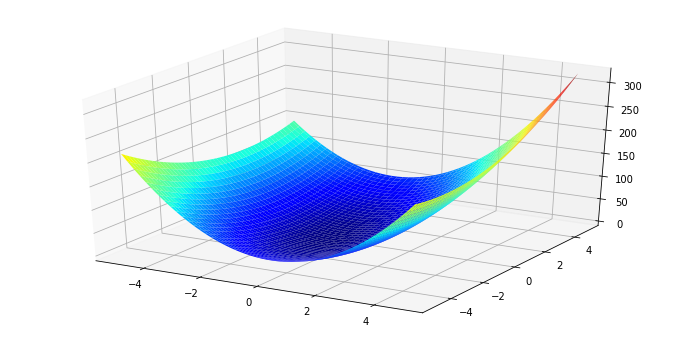

In [ ]:
def objective(x, y):
	return 7*x**2 + 2*y**2 + 2*x*y + 9*x + 3*y
draw_3d_model()

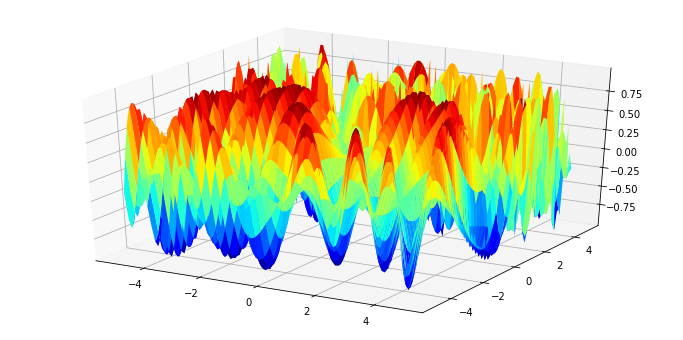

In [ ]:
def objective(x, y):
	return np.sin((0.5 * x ** 2) - (0.25 * y ** 2) + 3)*np.cos(2*x + 1 - math.e ** y)
draw_3d_model()

In [ ]:
def plot():
  a = -5
  b = 5
  # с видом сверху
  fig, ax = plt.subplots()
  p = ax.get_position()
  xaxis = arange(a, b, 0.1)
  yaxis = arange(a, b, 0.1)
  # создаем сетку
  x, y = meshgrid(xaxis, yaxis)
  results = f(x, y)
  plt.contour(xaxis, yaxis, results)
  line, = plt.plot([], color='black')
  ax.scatter(steps[:, 0], steps[:, 1], steps[:, 2],linestyle="-", marker=".", linewidth=1,c='red')
  plt.plot(steps[:, 0],steps[:, 1], color = 'red')

Number of iterations - 125
0.000109477844205796 3.14907491423408e-21


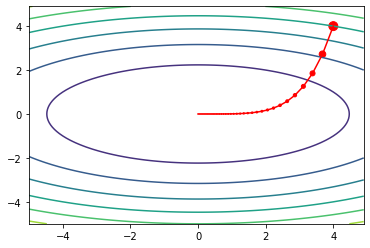

In [ ]:
# градиентный спуск с постоянным шагои
def f(x, y):
  return  4 * x ** 2 + 16 * y ** 2
steps = []
# xn - начальная точка; accuracy - точность; 
def gradient_descent(xn, yn,e , accuracy = 0.00001, n = 1000):
  for i in range(n):
    steps.append([xn, yn, f(xn, yn)])
    x = symbols('x')
    y = symbols('y')
    # вычеслили производную относительно x и y
    derivative_x = diff(f(x, y), x)
    derivative_y = diff(f(x, y), y)
    derivative_fxn = derivative_x.evalf(subs={x:xn,y:yn})
    derivative_fyn = derivative_y.evalf(subs={y:yn,x:xn})
    # уменьшаем значения
    xn_pred = xn
    yn_pred = yn
    xn = xn_pred - e * derivative_fxn
    yn = yn_pred - e * derivative_fyn
    if abs(xn_pred - xn) < accuracy and abs(yn_pred - yn) < accuracy:
      print(f"Number of iterations - {i}")
      break
  return print(xn, yn) 
gradient_descent(xn = 4, yn = 4, e = 0.01)
steps = np.array(steps)
steps = steps.astype(float)
plot()

Number of iterations - 26
-0.576925904954213 -0.461523781504176


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


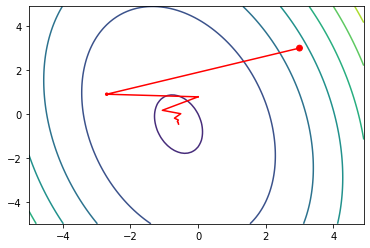

In [ ]:
def f(x, y):
  return  7*x**2 + 2*y**2 + 2*x*y + 9*x + 3*y
steps = []
gradient_descent(xn = 3, yn = 3, e = 0.1)
steps = np.array(steps)
steps = steps.astype(float)
plot()

3.46183972363759 3.25066558760402


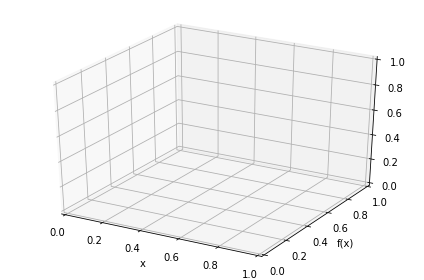

In [ ]:
def f(x, y):
  return  sympy.sin((0.5 * x ** 2) - (0.25 * y ** 2) + 3)*sympy.cos(2*x + 1 -  y)
steps = []
gradient_descent(xn = 3.0, yn = 3.0, e = 0.1)
steps = np.array(steps)
steps = steps.astype(float)
plot()

drob
drob
drob
Number of iterations - 157
0.000141194098785180 4.96437981293177e-20


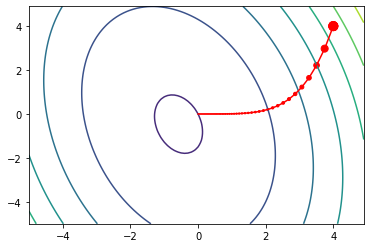

In [ ]:
# градиентный спуск метод дробления шага
def f(x, y):
  return  4 * x ** 2 + 16 * y ** 2
steps = []
# xn - начальная точка; accuracy - точность; 
def gradient_descent_drob(xn ,yn , accuracy = 0.00001, e = 1,d = 0.2, n = 1000):
  for i in range(n):
    steps.append([xn, yn, f(xn, yn)])
    x = symbols('x')
    y = symbols('y')
    # вычеслили производную относительно x и y
    derivative_x = diff(f(x, y), x)
    derivative_y = diff(f(x, y), y)
    derivative_fxn = derivative_x.evalf(subs={x:xn,y:yn})
    derivative_fyn = derivative_y.evalf(subs={y:yn,x:xn})
    # уменьшаем значения
    xn_pred = xn
    yn_pred = yn
    if not f(xn_pred , yn_pred) - f(xn_pred - e * derivative_fxn, yn_pred - e * derivative_fyn) >= 0.5 * e * (derivative_fxn ** 2 +derivative_fyn ** 2):
      print('drob')
      e = e * d
      continue
    elif f(xn_pred , yn_pred) - f(xn_pred - e * derivative_fxn, yn_pred - e * derivative_fyn) >= 0.5 * e * (derivative_fxn ** 2 +derivative_fyn ** 2):
      xn = xn_pred - e * derivative_fxn
      yn = yn_pred - e * derivative_fyn
    if abs(xn_pred - xn) < accuracy and abs(yn_pred - yn) < accuracy:
      print(f"Number of iterations - {i}")
      break
  return print(xn, yn) 
gradient_descent_drob(xn = 4, yn = 4)
steps = np.array(steps)
steps = steps.astype(float)
plot()

drob
drob
drob
Number of iterations - 157
0.000141194098785180 4.96437981293177e-20


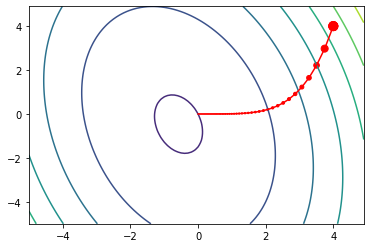

In [ ]:
# градиентный спуск метод дробления шага
def f(x, y):
  return  7*x**2 + 2*y**2 + 2*x*y + 9*x + 3*y
steps = []
gradient_descent_drob(xn = 4, yn = 4)
steps = np.array(steps)
steps = steps.astype(float)
plot()

Number of iterations - 23
2.41079315269726e-6 1.63432879394642e-6


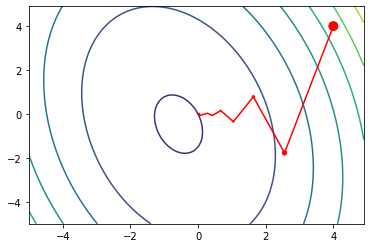

In [ ]:
# градиентный спуск метод золотого сечения
def f(x, y):
  return  4 * x ** 2 + 16 * y ** 2
steps = []
def golden_ratio(func , a = 0, b = 1, e = 0.1):
  golden_ratio_value_1 = (3 - np.sqrt(5)) / 2
  golden_ratio_value_2 = 1 - golden_ratio_value_1

  x_1 = a + golden_ratio_value_1 * (b - a)
  x_2 = a + golden_ratio_value_2 * (b - a)

  x_1_value = func(x_1)
  x_2_value = func(x_2)
  while (b - a)  > e:
    if x_1_value < x_2_value:
      b = x_2
      x_2 = x_1
      x_2_value = x_1_value
      x_1 = a + golden_ratio_value_1 * (b - a)
      x_1_value = func(x_1)
    elif x_1_value > x_2_value:
      a = x_1
      x_1 = x_2
      x_1_value = x_2_value
      x_2 = a + golden_ratio_value_2 * (b - a)
      x_2_value = func(x_2)
  return (a+b)/2
def gradient_descent_golden(xn ,yn , accuracy = 0.00001, n = 1000):
  for i in range(n):
    steps.append([xn, yn, f(xn, yn)])
    x = symbols('x')
    y = symbols('y')
    # вычеслили производную относительно x и y
    derivative_x = diff(f(x, y), x)
    derivative_y = diff(f(x, y), y)
    derivative_fxn = derivative_x.evalf(subs={x:xn,y:yn})
    derivative_fyn = derivative_y.evalf(subs={y:yn,x:xn})
    # уменьшаем значения
    xn_pred = xn
    yn_pred = yn
    g = lambda e: f(xn_pred - e * derivative_fxn , yn_pred - e * derivative_fyn)
    e = golden_ratio(g)
    xn = xn_pred - e * derivative_fxn
    yn = yn_pred - e * derivative_fyn
    if abs(xn_pred - xn) < accuracy and abs(yn_pred - yn) < accuracy:
      print(f"Number of iterations - {i}")
      break
  return print(xn, yn) 
gradient_descent_golden(xn = 4, yn = 4)
steps = np.array(steps)
steps = steps.astype(float)
plot()

Number of iterations - 24
-0.576921556840636 -0.461528278448884


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


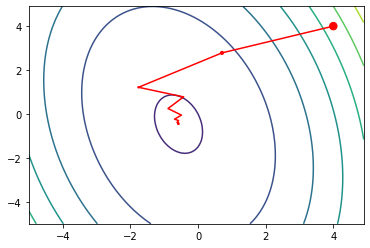

In [ ]:
def f(x, y):
  return  7*x**2 + 2*y**2 + 2*x*y + 9*x + 3*y
steps = []
gradient_descent_golden(xn = 4, yn = 4)
steps = np.array(steps)
steps = steps.astype(float)
plot()

Number of iterations - 23
2.e-6 1.63432879394642e-6


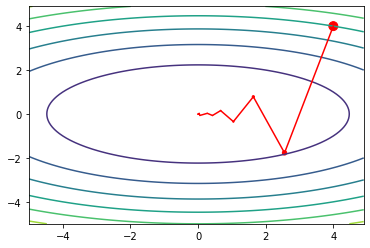

In [ ]:
# градиентный спуск метод фибоначи
def f(x, y):
  return  4 * x ** 2 + 16 * y ** 2
def fib(n):
  return 1 / np.sqrt(5) * (((1 + np.sqrt(5)) / 2) ** n - ((1 - np.sqrt(5)) / 2) ** n)
steps = []
def fibonacci(func , a = 0, b = 1, e = 0.1):
  delta = e / 2
  n = 1
  # Рассчитать количество итераций n
  while fib(n) < (b - a) / e:
    n+=1
  # Затем рассчитываются координаты двух точек
  x_1 = a + fib(n) / fib(n + 2) * (b - a)
  x_2 = a + fib(n + 1) / fib(n + 2) * (b - a)
  # и значение функции в этих точках
  x_1_value = func(x_1)
  x_2_value = func(x_2)
  for i in range(0, n):
    if x_1_value > x_2_value:
      a = x_1
      x_1 = x_2
      x_2 = b + a - x_1
      x_1_value = x_2_value
      x_2_value = func(x_2)
    else:
      b = x_2
      x_2 = x_1
      x_1 = b + a - x_2
      x_2_value = x_1_value
      x_1_value = func(x_1)
  return (a+b)/2
def gradient_descent_fibonacci(xn ,yn , accuracy = 0.00001, n = 1000):
  for i in range(n):
    steps.append([xn, yn, f(xn, yn)])
    x = symbols('x')
    y = symbols('y')
    # вычеслили производную относительно x и y
    derivative_x = diff(f(x, y), x)
    derivative_y = diff(f(x, y), y)
    derivative_fxn = derivative_x.evalf(subs={x:xn,y:yn})
    derivative_fyn = derivative_y.evalf(subs={y:yn,x:xn})
    # уменьшаем значения
    xn_pred = xn
    yn_pred = yn
    g = lambda e: f(xn_pred - e * derivative_fxn , yn_pred - e * derivative_fyn)
    e = golden_ratio(g)
    xn = xn_pred - e * derivative_fxn
    yn = yn_pred - e * derivative_fyn
    if abs(xn_pred - xn) < accuracy and abs(yn_pred - yn) < accuracy:
      print(f"Number of iterations - {i}")
      break
  return print(round(xn,6), yn) 
gradient_descent_fibonacci(xn = 4, yn = 4)
steps = np.array(steps)
steps = steps.astype(float)
plot()

Number of iterations - 24
-0.576921879024575 -0.461530571057365


/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


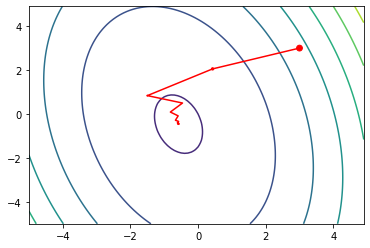

In [ ]:
def f(x, y):
  return  7*x**2 + 2*y**2 + 2*x*y + 9*x + 3*y
steps = []
gradient_descent_fibonacci(xn = 3, yn = 3)
steps = np.array(steps)
steps = steps.astype(float)
plot()

In [ ]:
def f(x, y):
  return  sympy.sin((0.5 * x ** 2) - (0.25 * y ** 2) + 3)*sympy.cos(2*x + 1 -  y)
steps = []
gradient_descent_fibonacci(xn = 3, yn = 3)
steps = np.array(steps)
steps = steps.astype(float)
plot()